# Assignment #6


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random 

%matplotlib notebook

## Part I - Writing your own k-NN implementation from scratch

Write a function - from scratch - that will implement your own version of the k-Nearest Neighbors algorithm.  

The function should have input parameters: 
- X (input data) 
- y (labels)
- k (# of neighbors)
- x (test point)

and output:

- y, the predicted label.

In [2]:
import math
from collections import Counter

def dot(v, w):
    returnVal = sum(v_i * w_i for v_i, w_i in zip(v, w))
    return returnVal

def subtract(v, w):
    returnVal = [v_i - w_i for v_i, w_i in zip(v, w)]
    return returnVal

def sum_of_squares(v):
    returnVal = dot(v, v)
    return returnVal

def squared_distance(v, w):
    returnVal = sum_of_squares(subtract(v, w))
    return returnVal

def distance(v, w):
    val = squared_distance(v, w)
    returnVal = math.sqrt(val)
    return returnVal

def determine_majority(labels):
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count for count in vote_counts.values() if count == winner_count])
    if num_winners == 1:
        return winner
    else:
        return determine_majority(labels[:-1])

def knn_classification(X, y, k, x):
    labeled_points = zip(X, y)
    sorted_by_distance = sorted(labeled_points, key=lambda point: distance(point[0], x))
    k_nearest_labels = [lp[1] for lp in sorted_by_distance[:k]]
    return determine_majority(k_nearest_labels)

Use your function to predict the classes from the iris dataset (included below), with k = 3.

In [3]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
r = []
for point in X_test:
    r.append(knn_classification(X_train, y_train, 3, point))

results = np.array(r)
print(results)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]


Use the sklearn version to predict the classes from the iris dataset (included below), with k = 3.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]


Verify that the answers from your function are the same as those from the sklearn implementation, by writing code that counts the number of differences between the y outputs from the two different methods.

In [7]:
differences = 0

for index in range(len(y_pred)):
    if(y_pred[index] != results[index]):
        differences += 1
        
print("The number of differences is " + str(differences))

The number of differences is 0


# Part II - Using sklearn regression models to fit a surface

In this problem we'll explore using linear and k-NN regression models to fit a surface.

In [8]:
# Let's start out with a function of x and y (i.e. z = f(x,y))

def f(x,y):
    return -3*np.exp((-(x-3)**2-(y-1)**2)/5) + 5*np.exp((-(x+1)**2-(y+2)**2)/2)

# then define a grid to visualize it over an area of x and y
x = np.linspace(-5,5, 100)
y = np.linspace(-5,5, 100)

# NOTE: I'm switching to X0 and X1, and Y, to indicate the 2-D versions - this will
# be a better match for our normal data and label notation
X0,X1 = np.meshgrid(x, y)
Y = f(X0,X1)

<IPython.core.display.Javascript object>


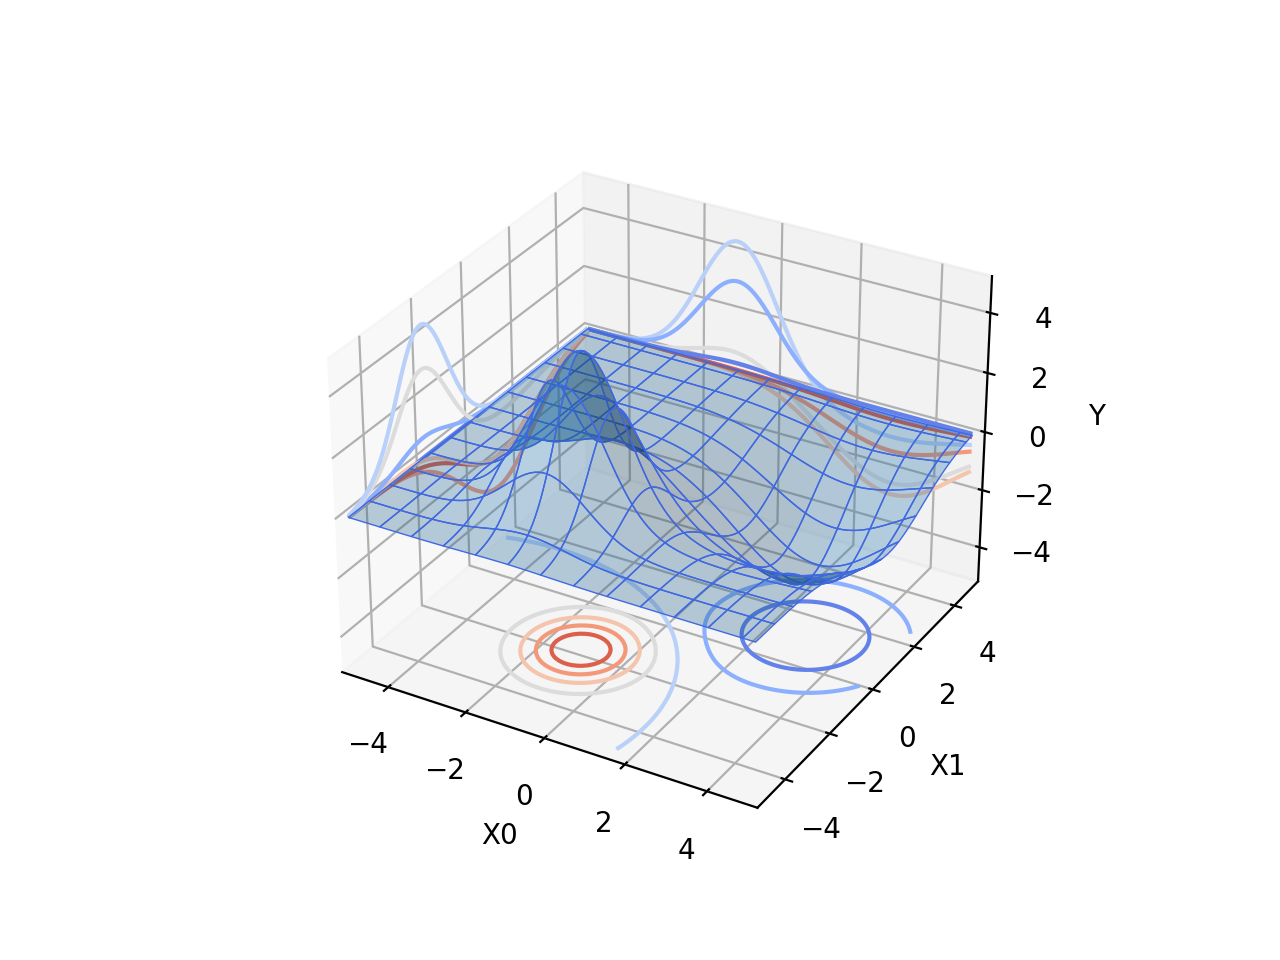

In [9]:
# Then let's visualize it
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(X0, X1, Y, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# Plot projections of the contours for each dimension.  BX1 choosing offsets
# that match the appropriate aX0es limits, the projected contours will sit on
# the 'walls' of the graph.
# ax.contour(X0, X1, Y, xdir='Y', offset=-5, cmap='coolwarm')
# ax.contour(X0, X1, Y, ydir='X0', offset=-5, cmap='coolwarm')
# ax.contour(X0, X1, Y, zdir='X1', offset=5, cmap='coolwarm')
ax.contour(X0, X1, Y, zdir='z', offset=-5, cmap='coolwarm')
ax.contour(X0, X1, Y, zdir='x', offset=-5, cmap='coolwarm')
ax.contour(X0, X1, Y, zdir='y', offset=5, cmap='coolwarm')
ax.set(xlim=(-5,5), ylim=(-5,5), zlim=(-5, 5),
       xlabel='X0', ylabel='X1', zlabel='Y')

plt.show()

In [19]:
# Now let's assume we only have access to a subset of the original points
def flatten(x):
     flat = []
     for row in x:
         flat.extend(row)
     return flat

# write code to flatten X0, X1, and Y so we can work with normal 1-D versions
X0f = flatten(X0)
X1f = flatten(X1)
Yf = flatten(Y)

random_indices = []

for x in range(100):
    random_indices.append(random.randint(1, len(X0f)))

# select a total of 100 random points (still 1-D)
X0r = [X0f[index] for index in random_indices]
X1r = [X1f[index] for index in random_indices]
Yr = [Yf[index] for index in random_indices]

<IPython.core.display.Javascript object>


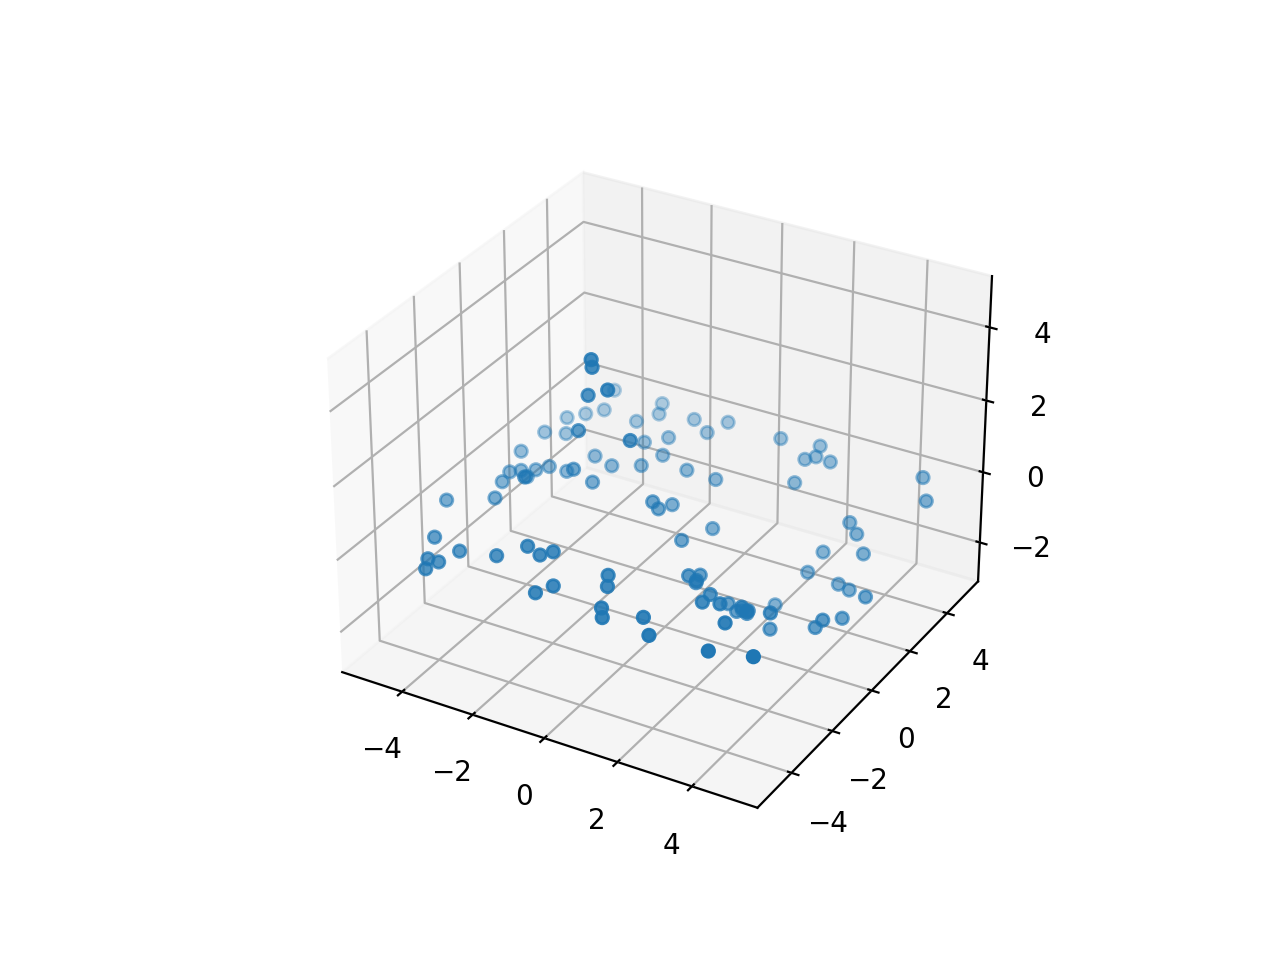

In [20]:
# show those random points in a scatter plot
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(X0r,X1r,Yr)

In [21]:
# shape the 100 randomly selected points into the standard form for X and y 
# (i.e. X_train should have shape of (100,2) and y_train should have shape (100,)

X0r_temp = np.array(X0r).reshape(100,1)
X1r_temp = np.array(X1r).reshape(100,1)

X_train = np.hstack([X0r_temp, X1r_temp])
y_train = np.array(Yr).reshape(100,)

In [22]:
from sklearn.linear_model import LinearRegression

# train a linear regression classifier on X_
lr = LinearRegression().fit(X_train, y_train)

In [23]:
# then reshape as necessary, and
X_total = np.hstack([np.array(flatten(X0)).reshape(len(flatten(X0)),1), np.array(flatten(X1)).reshape(len(flatten(X1)),1)])
y_total = np.array(Yf).reshape(len(Yf),1)

# then use the trained classifier to predict values for the entire grid
y_total_pred = lr.predict(X_total)

<IPython.core.display.Javascript object>


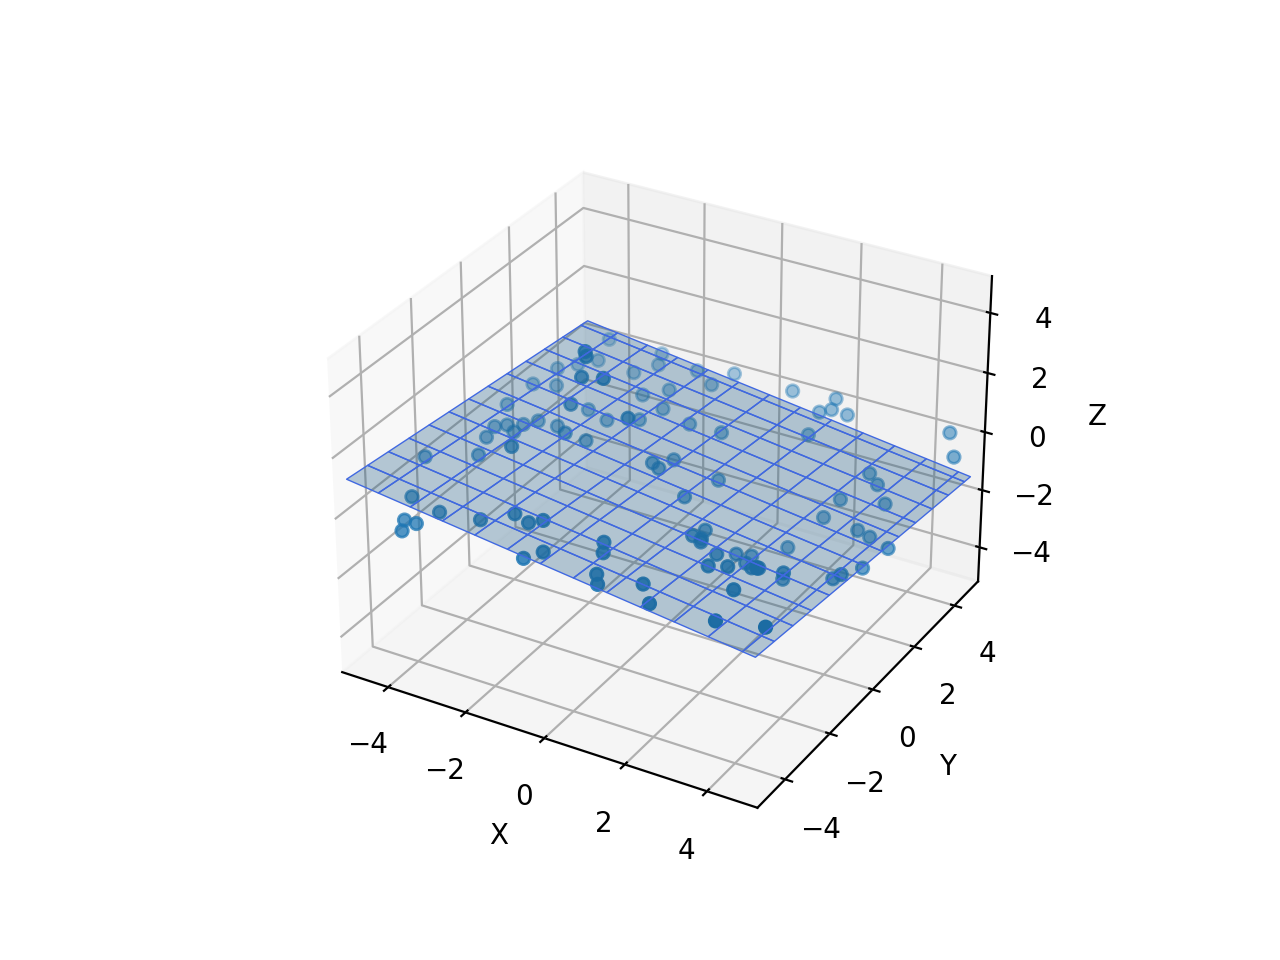

In [24]:
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(X_total[:,0].reshape(X0.shape), X_total[:,1].reshape(X0.shape), y_total_pred.reshape(X0.shape), edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.3)

ax.set(xlim=(-5,5), ylim=(-5,5), zlim=(-5, 5),
       xlabel='X', ylabel='Y', zlabel='Z')
ax.scatter(X0r,X1r,Yr)
plt.show()

In [25]:
# then redo this for a k-NN model with 3 neighbors
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(X_train, y_train)
y_total_pred = clf.predict(X_total)

<IPython.core.display.Javascript object>


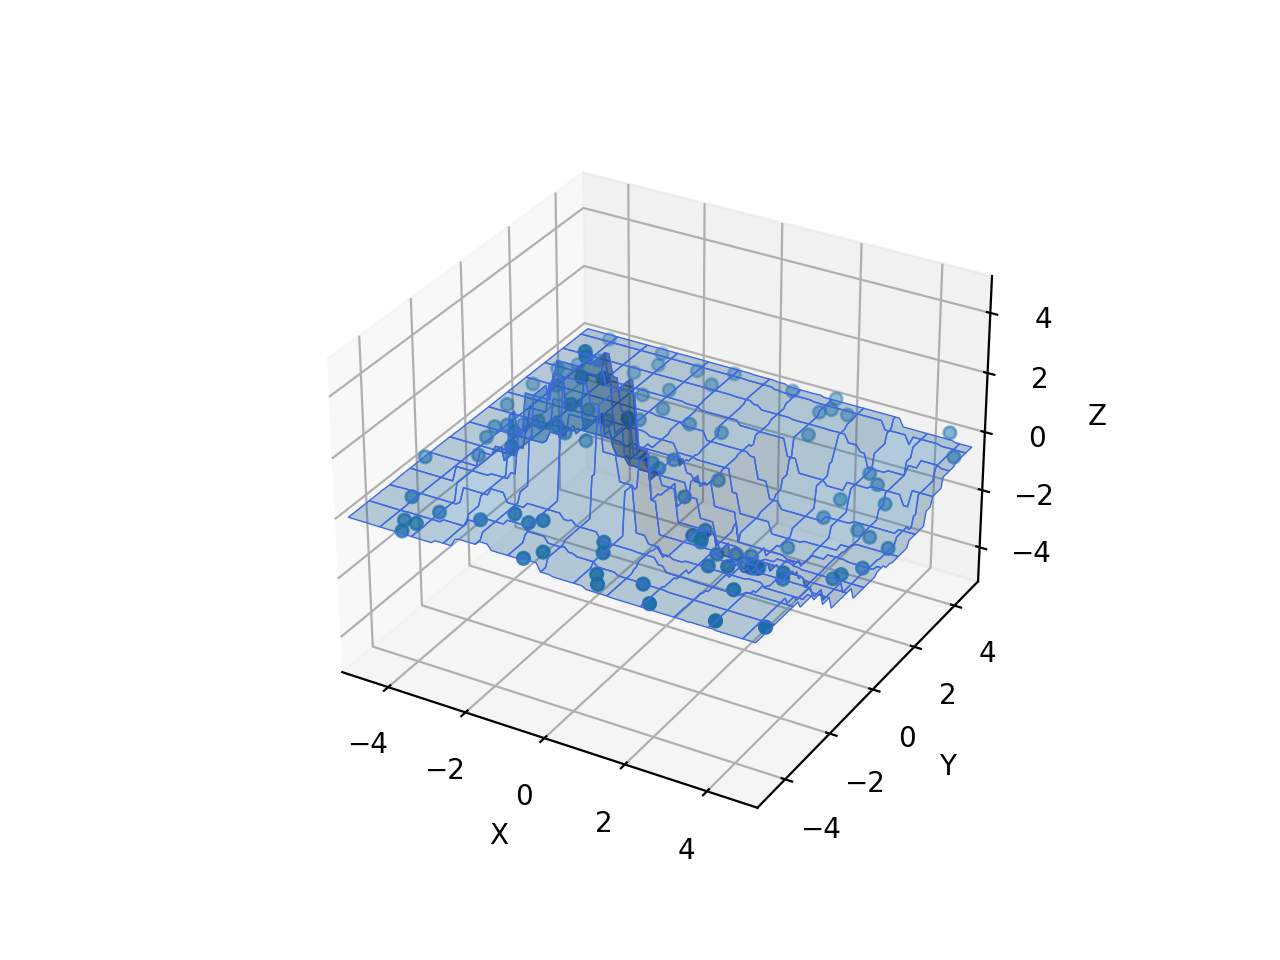

In [26]:
# and plot the results
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(X_total[:,0].reshape(X0.shape), X_total[:,1].reshape(X0.shape), y_total_pred.reshape(X0.shape), edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.3)

ax.set(xlim=(-5,5), ylim=(-5,5), zlim=(-5, 5),
       xlabel='X', ylabel='Y', zlabel='Z')
ax.scatter(X0r,X1r,Yr)
plt.show()